In [2]:
import pandas as pd
import numpy as np
import time
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Import static data

In [3]:
df1 = pd.read_json("./data/w01-18.json")
df2 = pd.read_json("./data/w19-34.json")
df3 = pd.read_json("./data/w35-49.json")
df4 = pd.read_json("./data/w50-52.json")

print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)

(3025, 8)
(2689, 8)
(2521, 8)
(1057, 8)


In [4]:
df = pd.concat([df1, df2, df3, df4])

In [5]:
df.columns = ["ts", "open", "high", "low", "close", "vol_btc", "vol_cur", "weighted_price"]

In [6]:
df["ts"] = pd.to_datetime(df["ts"], unit="s")
print(df.shape)
print(df.head())
print(df.tail())

(9292, 8)
                   ts    open    high     low   close     vol_btc  \
0 2017-01-01 00:00:00  966.34  966.99  964.60  966.60  102.484806   
1 2017-01-01 01:00:00  966.60  966.60  962.54  963.87  149.025554   
2 2017-01-01 02:00:00  964.35  965.75  961.99  963.97   94.267396   
3 2017-01-01 03:00:00  963.88  964.71  960.53  962.83   77.619667   
4 2017-01-01 04:00:00  960.61  963.64  960.60  963.46   46.810220   

         vol_cur  weighted_price  
0   99027.385808      966.264073  
1  143716.718251      964.376340  
2   90901.736169      964.296672  
3   74736.649236      962.857117  
4   45054.655498      962.496122  
                      ts      open      high       low     close     vol_btc  \
1052 2017-12-31 22:00:00  14024.70  14050.00  13905.00  13950.00  170.134820   
1053 2017-12-31 22:30:00  13909.65  13970.07  13803.20  13937.95   97.710511   
1054 2017-12-31 23:00:00  13925.00  13950.00  13807.86  13930.01  116.142320   
1055 2017-12-31 23:30:00  13950.00  13999.98 

#### First plot

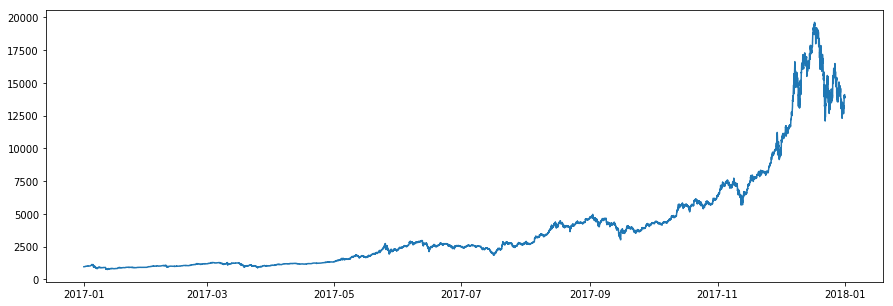

In [7]:
plt.figure(figsize=(15,5))
plt.plot(df["ts"], df["open"])

#### Select sub-range

In [10]:
march = df[df.ts > "2017-03-01 00:00:00"]
print(march.head())
print(march.tail())

                      ts     open     high      low    close     vol_btc  \
1417 2017-03-01 01:00:00  1191.67  1194.54  1190.14  1193.23  172.085008   
1418 2017-03-01 02:00:00  1194.12  1196.28  1193.02  1194.29   80.073251   
1419 2017-03-01 03:00:00  1193.52  1195.54  1190.22  1191.85  194.365953   
1420 2017-03-01 04:00:00  1192.57  1193.80  1190.22  1193.80   53.114691   
1421 2017-03-01 05:00:00  1192.06  1195.23  1191.13  1192.99  128.199576   

            vol_cur  weighted_price  
1417  205278.653475     1192.890981  
1418   95620.405928     1194.161659  
1419  231919.802328     1193.212079  
1420   63309.747280     1191.944198  
1421  152991.749122     1193.387322  
                      ts      open      high       low     close     vol_btc  \
1052 2017-12-31 22:00:00  14024.70  14050.00  13905.00  13950.00  170.134820   
1053 2017-12-31 22:30:00  13909.65  13970.07  13803.20  13937.95   97.710511   
1054 2017-12-31 23:00:00  13925.00  13950.00  13807.86  13930.01  116.14232

## Set timestamp as index

In [11]:
df = df.set_index("ts")
print(df.tail())

                         open      high       low     close     vol_btc  \
ts                                                                        
2017-12-31 22:00:00  14024.70  14050.00  13905.00  13950.00  170.134820   
2017-12-31 22:30:00  13909.65  13970.07  13803.20  13937.95   97.710511   
2017-12-31 23:00:00  13925.00  13950.00  13807.86  13930.01  116.142320   
2017-12-31 23:30:00  13950.00  13999.98  13823.19  13880.00  107.096438   
2018-01-01 00:00:00  13880.00  13906.37  13631.95  13726.16  183.973078   

                          vol_cur  weighted_price  
ts                                                 
2017-12-31 22:00:00  2.377346e+06    13973.307569  
2017-12-31 22:30:00  1.355904e+06    13876.751387  
2017-12-31 23:00:00  1.616694e+06    13919.940065  
2017-12-31 23:30:00  1.491910e+06    13930.527205  
2018-01-01 00:00:00  2.523309e+06    13715.643711  


In [12]:
df.loc["2017-03-01":"2017-03-10"]

,open,high,low,close,vol_btc,vol_cur,weighted_price
ts,,,,,,,
2017-03-01 00:00:00,1191.16,1193.41,1189.00,1193.39,192.532101,2.293101e+05,1191.022629
2017-03-01 01:00:00,1191.67,1194.54,1190.14,1193.23,172.085008,2.052787e+05,1192.890981
2017-03-01 02:00:00,1194.12,1196.28,1193.02,1194.29,80.073251,9.562041e+04,1194.161659
2017-03-01 03:00:00,1193.52,1195.54,1190.22,1191.85,194.365953,2.319198e+05,1193.212079
2017-03-01 04:00:00,1192.57,1193.80,1190.22,1193.80,53.114691,6.330975e+04,1191.944198
2017-03-01 05:00:00,1192.06,1195.23,1191.13,1192.99,128.199576,1.529917e+05,1193.387322
2017-03-01 06:00:00,1191.54,1193.25,1188.30,1189.63,303.963213,3.618416e+05,1190.412598
2017-03-01 07:00:00,1191.41,1193.73,1189.60,1190.00,131.266778,1.564984e+05,1192.216577
2017-03-01 08:00:00,1190.00,1194.82,1190.00,1194.00,134.896062,1.609676e+05,1193.271335


## Set week number and weekday

In [14]:
date = datetime(2017,12, 1)
week = date.isocalendar()[1]
print("Week:", week)

weekday = date.isoweekday()
print("Weekday: ", weekday)

Week: 48
Weekday:  5


#### re-add ts as a column

In [22]:
df["ts"] = df.index
df.tail()

,open,high,low,close,vol_btc,vol_cur,weighted_price,ts
ts,,,,,,,,
2017-12-31 22:00:00,14024.70,14050.00,13905.00,13950.00,170.134820,2.377346e+06,13973.307569,2017-12-31 22:00:00
2017-12-31 22:30:00,13909.65,13970.07,13803.20,13937.95,97.710511,1.355904e+06,13876.751387,2017-12-31 22:30:00
2017-12-31 23:00:00,13925.00,13950.00,13807.86,13930.01,116.142320,1.616694e+06,13919.940065,2017-12-31 23:00:00
2017-12-31 23:30:00,13950.00,13999.98,13823.19,13880.00,107.096438,1.491910e+06,13930.527205,2017-12-31 23:30:00
2018-01-01 00:00:00,13880.00,13906.37,13631.95,13726.16,183.973078,2.523309e+06,13715.643711,2018-01-01 00:00:00


### Functions
* getWeekNumber(date)
* getWeekday(date)

In [48]:
def getWeekNumber(date):
    return date.isocalendar()[1]

def getYear(date):
    return date.isocalendar()[0]

def getWeekday(date):
    return date.isoweekday()

def getYearAndWeek(date):
    y = str(getYear(date)) + (str(getWeekNumber(date)) if getWeekNumber(date)>10 \
        else '0' + str(getWeekNumber(date)))
    return y

#### Add columns
* weekNumber
* weekday

In [55]:
df["weekNumber"] = df["ts"].apply(getWeekNumber)
df["weekday"] = df["ts"].apply(getWeekday)
df["timeRef"] = df["ts"].apply(getYearAndWeek)
df = df.sort_values(by='ts')
df.tail()

,open,high,low,close,vol_btc,vol_cur,weighted_price,ts,weekNumber,weekday,timeRef
ts,,,,,,,,,,,
2017-12-31 22:00:00,14024.70,14050.00,13905.00,13950.00,170.134820,2.377346e+06,13973.307569,2017-12-31 22:00:00,52,7,201752
2017-12-31 22:30:00,13909.65,13970.07,13803.20,13937.95,97.710511,1.355904e+06,13876.751387,2017-12-31 22:30:00,52,7,201752
2017-12-31 23:00:00,13925.00,13950.00,13807.86,13930.01,116.142320,1.616694e+06,13919.940065,2017-12-31 23:00:00,52,7,201752
2017-12-31 23:30:00,13950.00,13999.98,13823.19,13880.00,107.096438,1.491910e+06,13930.527205,2017-12-31 23:30:00,52,7,201752
2018-01-01 00:00:00,13880.00,13906.37,13631.95,13726.16,183.973078,2.523309e+06,13715.643711,2018-01-01 00:00:00,1,1,201801


In [205]:



#Drop first because E to week 52
# Drop last be

df = df.sort_values(by='ts')
#nbWrongFirst = df.loc[df["weekNumber"] == 52 ].shape[0]
#nbWrongFirst = df.loc[df["weekNumber"] == 52 ].shape[0]
nb2018 = df["2018-01":].shape[0]
aa = df.loc["2017-01-01":"2017-01-10"]
aa = aa[aa["weekNumber"] == 52]
nbWrongFirst = aa.shape[0]
#.loc[df["weekNumber"] == 52 ]

print("Nb2018: ", nb2018)
print("nbWrongFirst: ", nbWrongFirst)
#df[:"2017-01"]
#df[:"2017-01", df["weekNumber"] == 51 ]
#.shape[0]
#[df["weekNumber"] == 51]
df = df[nbWrongFirst:-nb2018]

print("Head: ",df.head())
print("Tail: ",df.tail())
# Drop first because E to week 52
# Drop last b/c E to week 01
#df = df[1:-1]


Nb2018:  1
nbWrongFirst:  24
Head:                          open     high      low    close     vol_btc  \
ts                                                                    
2017-01-02 00:00:00   997.75   999.89   996.89   997.69  129.114456   
2017-01-02 01:00:00   997.70   998.46   997.68   998.46   78.177303   
2017-01-02 02:00:00   998.46  1005.00   998.44  1005.00  577.409632   
2017-01-02 03:00:00  1004.99  1005.75  1004.55  1005.75  166.414071   
2017-01-02 04:00:00  1005.66  1005.73  1003.55  1005.73  148.444520   

                           vol_cur  weighted_price                  ts  \
ts                                                                       
2017-01-02 00:00:00  128811.825707      997.656107 2017-01-02 00:00:00   
2017-01-02 01:00:00   78015.096920      997.925151 2017-01-02 01:00:00   
2017-01-02 02:00:00  578248.296397     1001.452460 2017-01-02 02:00:00   
2017-01-02 03:00:00  167295.532632     1005.296796 2017-01-02 03:00:00   
2017-01-02 04:00:00  1

## Day - get Max&Min percentages 
Example with Week 9 : 27-02 -> 05-03

In [58]:
# Example with week 9
df_week = df[df.weekNumber == 9]

# Get monday, open & end
df_day = df_week[df_week["weekday"] == 1]
openDate = df_day.index[0].replace(hour=5)
endDate = openDate.replace(hour=21)
print("open at: ", openDate, ". End: ", endDate)

open = df_day.loc[openDate]["open"]
print("Open: ", open)

# Get data in the time range [open-end]
time_range = df_day[(df_day["ts"] < endDate) & (df_day["ts"] >= openDate)]
max = time_range["high"].max()
min = time_range["low"].min()
print("Max: ", max)
print("Min: ", min)

# Get percentage
percentageMax = (max - open)/open
percentageMin = (min - open)/open

print("Percentage max: ",(percentageMax*100).round(2), "%")
print("Percentage min: ",(percentageMin*100).round(2), "%")

open at:  2017-02-27 05:00:00 . End:  2017-02-27 21:00:00
Open:  1182.59
Max:  1197.99
Min:  1169.0
Percentage max:  1.3 %
Percentage min:  -1.15 %


In [212]:

data = pd.Series([102, 100], index=["max", "min"])
print(data)
df_per = pd.DataFrame()
df_per = df_per.append(data, ignore_index=True)

data = pd.Series([105, 90], index=["max", "min"])
df_per = df_per.append(data, ignore_index=True)
df_per

max    102
min    100
dtype: int64


,max,min
0,102.0,100.0
1,105.0,90.0


In [213]:
openHour = 5
endHour = 21

def getPercentageInWeek(df_week):
    for i in range(1,8):
        df_day = df_week[df_week["weekday"] == i]
        openDate = df_day.index[0].replace(hour=openHour)
        endDate = openDate.replace(hour=endHour)

        open = df_day.loc[openDate]["open"]

        time_range = df_day[(df_day["ts"] < endDate) & (df_day["ts"] >= openDate)]
        max = time_range["high"].max()
        min = time_range["low"].min()

        percentageMax = (max - open)/open
        percentageMin = (min - open)/open

        percentage = (max - open)/open
       # print(df_day)
        print(df_day.index[0].strftime("%m-%d"),"percentages: ",(percentageMax*100).round(2), "%",
             "/", (percentageMin*100).round(2), "%")
    return

df_week = df[df.weekNumber == 9]
getPercentageInWeek(df_week)

02-27 percentages:  1.3 % / -1.15 %
02-28 percentages:  0.37 % / -1.39 %
03-01 percentages:  3.27 % / -0.32 %
03-02 percentages:  5.02 % / -0.24 %
03-03 percentages:  3.02 % / -0.4 %
03-04 percentages:  0.35 % / -3.93 %
03-05 percentages:  1.94 % / -0.86 %


In [214]:
for i in range(1,53):
    df_week = df[df.weekNumber == i]
    getPercentageInWeek(df_week)

01-02 percentages:  2.64 % / -1.54 %
01-03 percentages:  0.28 % / -1.42 %
01-04 percentages:  9.36 % / -0.38 %
01-05 percentages:  1.67 % / -20.81 %
01-06 percentages:  2.07 % / -10.2 %
01-07 percentages:  8.18 % / -3.01 %
01-08 percentages:  0.41 % / -6.04 %
01-09 percentages:  2.89 % / -0.57 %
01-10 percentages:  1.9 % / -0.68 %
01-11 percentages:  1.05 % / -16.93 %
01-12 percentages:  8.06 % / -1.59 %
01-13 percentages:  5.4 % / -1.75 %
01-14 percentages:  1.63 % / -0.8 %
01-15 percentages:  0.53 % / -1.35 %
01-16 percentages:  0.79 % / -0.99 %
01-17 percentages:  6.35 % / -0.1 %
01-18 percentages:  0.07 % / -5.37 %
01-19 percentages:  3.0 % / -0.0 %
01-20 percentages:  1.23 % / -1.13 %
01-21 percentages:  0.58 % / -1.1 %
01-22 percentages:  0.35 % / -5.11 %
01-23 percentages:  0.87 % / -0.55 %
01-24 percentages:  0.18 % / -2.5 %
01-25 percentages:  0.72 % / -0.92 %
01-26 percentages:  2.39 % / -0.58 %
01-27 percentages:  1.38 % / -0.47 %
01-28 percentages:  0.01 % / -0.75 %
01-29 p

09-04 percentages:  0.08 % / -10.53 %
09-05 percentages:  8.55 % / -2.37 %
09-06 percentages:  5.81 % / -0.86 %
09-07 percentages:  2.79 % / -1.59 %
09-08 percentages:  2.18 % / -9.61 %
09-09 percentages:  2.55 % / -2.22 %
09-10 percentages:  3.56 % / -3.72 %
09-11 percentages:  2.52 % / -2.24 %
09-12 percentages:  2.15 % / -4.8 %
09-13 percentages:  0.9 % / -7.21 %
09-14 percentages:  2.22 % / -14.78 %
09-15 percentages:  13.81 % / -10.34 %
09-16 percentages:  2.46 % / -7.41 %
09-17 percentages:  4.5 % / -4.07 %
09-18 percentages:  9.29 % / -0.15 %
09-19 percentages:  3.85 % / -1.13 %
09-20 percentages:  5.3 % / -0.5 %
09-21 percentages:  1.3 % / -7.53 %
09-22 percentages:  0.89 % / -5.76 %
09-23 percentages:  3.08 % / -0.76 %
09-24 percentages:  1.64 % / -1.63 %
09-25 percentages:  4.83 % / -1.21 %
09-26 percentages:  1.5 % / -1.55 %
09-27 percentages:  6.62 % / -0.18 %
09-28 percentages:  0.74 % / -2.71 %
09-29 percentages:  3.75 % / -1.3 %
09-30 percentages:  3.79 % / -0.02 %
10-01

## Save Max/Min

In [215]:
openHour = 5
endHour = 18

max_min_df = pd.DataFrame()

def getPercentageInWeek(df_week):
    global max_min_df
    for i in range(1,8):
        df_day = df_week[df_week["weekday"] == i]
        openDate = df_day.index[0].replace(hour=openHour)
        endDate = openDate.replace(hour=endHour)

        open = df_day.loc[openDate]["open"]

        time_range = df_day[(df_day["ts"] < endDate) & (df_day["ts"] >= openDate)]
        max = time_range["high"].max()
        min = time_range["low"].min()
        percentageMax = (max - open)/open
        percentageMin = (min - open)/open
        
        percentageMax = (percentageMax*100).round(2)
        percentageMin = (percentageMin*100).round(2)
        
        serie = pd.Series([percentageMax, percentageMin,max, min,df_day.index[0]], 
                          index=["percentageMax", "percentageMin", "max", "min", "ts"])
        max_min_df = max_min_df.append(serie, ignore_index=True)
        
        #print(df_day.index[0].strftime("%m-%d"),"percentages: ",percentageMax, "%",
         #    "/", percentageMin, "%")
    return

#df_week = df[df.weekNumber == 9]
#getPercentageInWeek(df_week)
max_min_df

""


In [216]:
for i in range(1,49):
    df_week = df[df.weekNumber == i]
    getPercentageInWeek(df_week)
max_min_df.head()

,max,min,percentageMax,percentageMin,ts
0,1032.00,998.72,2.64,-0.67,2017-01-02
1,1026.50,1009.08,0.28,-1.42,2017-01-03
2,1129.90,1038.35,8.40,-0.38,2017-01-04
3,1136.72,885.41,1.67,-20.81,2017-01-05
4,989.97,871.00,2.07,-10.20,2017-01-06


In [217]:
max_min_df = max_min_df.set_index("ts")
max_min_df

,max,min,percentageMax,percentageMin
ts,,,,
2017-01-02,1032.00,998.72,2.64,-0.67
2017-01-03,1026.50,1009.08,0.28,-1.42
2017-01-04,1129.90,1038.35,8.40,-0.38
2017-01-05,1136.72,885.41,1.67,-20.81
2017-01-06,989.97,871.00,2.07,-10.20
2017-01-07,906.00,812.28,8.18,-3.01
2017-01-08,941.81,881.30,0.41,-6.04
2017-01-09,910.58,879.94,2.89,-0.57
2017-01-10,912.47,889.41,1.90,-0.68


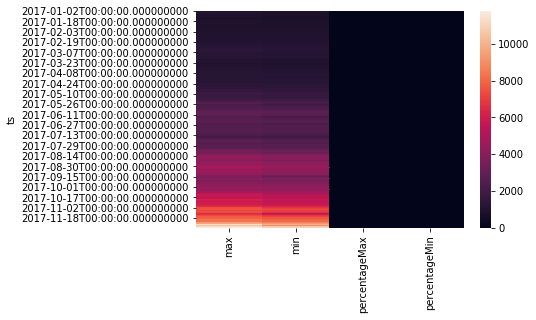

In [218]:
sns.heatmap(max_min_df)

## Dataframe with percentage by hours

In [219]:
def getPercentageByDay(df_day, beginHour, endHour):
    high = getHighPercentageByDay(df_day, beginHour, endHour)
    low = getLowPercentageByDay(df_day, beginHour, endHour)
    return high, low

def getHighPercentageByDay(df_day, beginHour, endHour):
    openDate = df_day.index[0].replace(hour=beginHour)
    open = df_day.loc[openDate]["open"]
    #print("Open: ", open)
    day_serie = pd.Series([])
    for i in range(beginHour, endHour+1):
        date = df_day.index[0].replace(hour=i)
        high = df_day.loc[date]["high"]
        percentage = getPercentage(open, high)
        day_serie = day_serie.append(pd.Series([percentage]), ignore_index=True)
    day_serie = day_serie.rename(df_day.index[0])
    return day_serie

def getLowPercentageByDay(df_day, beginHour, endHour):
    openDate = df_day.index[0].replace(hour=beginHour)
    open = df_day.loc[openDate]["open"]
    day_serie = pd.Series([])
    for i in range(beginHour, endHour+1):
        date = df_day.index[0].replace(hour=i)
        low = df_day.loc[date]["low"]
        percentage = getPercentage(open, low)
        day_serie = day_serie.append(pd.Series([percentage]), ignore_index=True)
    day_serie = day_serie.rename(df_day.index[0])
    return day_serie
    

def getPercentage(open, high):
    percentage = (high - open)/open
    percentage = (percentage*100).round(2)
    return percentage

def __main__():
    df_week = df[df.weekNumber == 9]
    df_day = df_week[df_week["weekday"] == 1]
    openHour = 6
    endHour = 18
    d1 = getHighPercentageByDay(df_day, openHour, endHour)
    df_p = pd.DataFrame()
    #df_p = df_p.append(d1)
    #d1 = getLowPercentageByDay(df_day, openHour, endHour)
    #df_p = df_p.append(d1)
    
    #df_day = df_week[df_week["weekday"] == 2]
    #d2 = getLowPercentageByDay(df_day, openHour, endHour)
    #df_p = df_p.append(d2)
    
    high, low = getPercentageByDay(df_day, openHour, endHour)
    print(high, low)
    df_p = df_p.append(high)
    df_p = df_p.append(low)
    print(df_p)
    #df_p.columns = range(openHour, endHour+1)
    return df_p
    
__main__()

0     0.35
1     0.51
2     0.52
3     0.67
4     0.63
5     0.75
6     0.54
7     0.23
8     0.23
9     0.45
10    1.39
11    1.56
12    1.49
Name: 2017-02-27 00:00:00, dtype: float64 0    -0.29
1     0.07
2    -0.53
3    -0.23
4     0.19
5     0.19
6    -0.73
7    -0.39
8    -0.17
9     0.03
10    0.20
11    0.84
12    0.90
Name: 2017-02-27 00:00:00, dtype: float64
              0     1     2     3     4     5     6     7     8     9     10  \
2017-02-27  0.35  0.51  0.52  0.67  0.63  0.75  0.54  0.23  0.23  0.45  1.39   
2017-02-27 -0.29  0.07 -0.53 -0.23  0.19  0.19 -0.73 -0.39 -0.17  0.03  0.20   

              11    12  
2017-02-27  1.56  1.49  
2017-02-27  0.84  0.90  


,0,1,2,3,4,5,6,7,8,9,10,11,12
2017-02-27,0.35,0.51,0.52,0.67,0.63,0.75,0.54,0.23,0.23,0.45,1.39,1.56,1.49
2017-02-27,-0.29,0.07,-0.53,-0.23,0.19,0.19,-0.73,-0.39,-0.17,0.03,0.20,0.84,0.90


In [220]:
def getPercentageByWeek(df_week, openHour, endHour):
    df_high_percentage = pd.DataFrame()
    df_low_percentage = pd.DataFrame()
    for i in range(1,8):
        df_day = df_week[df_week["weekday"] == i]
        df_high_percentage_day, df_low_percentage_day = getPercentageByDay(df_day, openHour, endHour)
        
        df_high_percentage = df_high_percentage.append(df_high_percentage_day)
        df_low_percentage = df_low_percentage.append(df_low_percentage_day)
    df_high_percentage.columns = range(openHour, endHour+1)
    df_low_percentage.columns = range(openHour, endHour+1)
    return df_high_percentage, df_low_percentage


df_week = df[df.weekNumber == 9]
openHour = 5
endHour = 18
df_high_percentage, df_low_percentage = getPercentageByWeek(df_week, openHour, endHour)
df_high_percentage

,5,6,7,8,9,10,11,12,13,14,15,16,17,18
2017-02-27,0.35,0.10,0.26,0.27,0.42,0.38,0.50,0.29,-0.03,-0.02,0.20,1.13,1.30,1.23
2017-02-28,0.37,0.37,-0.12,-0.07,-0.05,0.12,-0.28,-0.68,-0.68,-0.74,-0.57,0.02,0.12,0.30
2017-03-01,0.27,0.10,0.14,0.23,0.26,0.49,1.09,1.50,2.51,3.01,3.27,2.34,2.37,2.81
2017-03-02,0.19,0.17,0.49,0.66,0.95,0.95,0.99,1.15,1.47,1.47,2.70,3.19,5.02,5.00
2017-03-03,0.48,0.03,0.87,1.59,2.10,3.02,2.46,2.73,2.73,1.42,1.59,1.49,0.93,0.93
2017-03-04,0.08,0.35,0.13,-0.06,-0.06,-0.23,-0.24,-0.46,-0.26,-0.41,-1.40,-1.79,-2.19,-1.51
2017-03-05,0.56,0.45,0.07,-0.16,-0.23,-0.06,-0.06,0.57,0.75,1.04,1.54,1.77,1.62,1.94


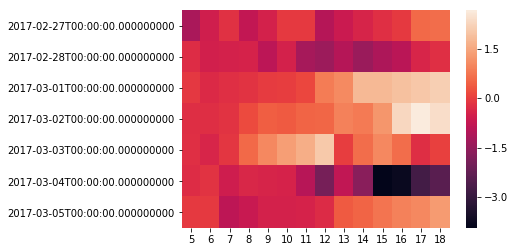

In [221]:
#df_percentage = df_percentage.pivot("Date", "Hour", "%")
sns.heatmap(df_low_percentage)

In [238]:
df_year_high = pd.DataFrame()
df_year_low = pd.DataFrame()
openHour = 6
endHour = 18

for i in range(1,53):
    df_week = df[df.weekNumber == i]
    df_high_percentage, df_low_percentage = getPercentageByWeek(df_week, openHour, endHour)
    df_year_high = df_year_high.append(df_high_percentage)
    df_year_low = df_year_low.append(df_low_percentage)

print(df_year_high.head())
print(df_year_high.tail())
print(df_year_low.head())
print(df_year_low.tail())

              6     7     8     9     10    11    12    13     14     15  \
2017-01-02  0.00  0.10  0.16  1.00  1.89  1.99  1.99  1.99   1.98   2.49   
2017-01-03  0.00 -0.56 -0.13  0.09  0.24  0.39  0.63  0.36  -0.01   0.45   
2017-01-04  0.21  0.88  0.88  1.64  2.88  3.95  4.07  4.86   4.85   4.03   
2017-01-05  0.03 -0.20  1.48  1.45 -0.46 -1.18 -1.96 -9.39 -13.32 -11.09   
2017-01-06  0.45  1.01  0.56 -1.61 -3.63 -5.26 -7.96 -7.66  -7.66  -6.34   

               16     17     18  
2017-01-02   2.69   2.06   1.88  
2017-01-03   0.09   0.09   0.09  
2017-01-04   4.87   7.84   8.79  
2017-01-05 -11.37 -13.36 -12.07  
2017-01-06  -6.13  -6.64  -6.28  
              6     7     8     9     10    11    12    13    14    15    16  \
2017-12-27  0.98  0.49 -0.52 -1.08 -2.48 -3.40 -2.73 -2.64 -3.06 -5.88 -5.85   
2017-12-28  1.99  3.78  3.98  4.56  4.93  1.22  1.73  4.56  4.03  6.07  4.61   
2017-12-29  1.30  0.09 -1.75 -2.12 -2.75 -4.18 -3.69 -4.62 -2.65 -2.72 -1.26   
2017-12-30  1.15  1

In [290]:
def getHighLowDF(df, openHour,endHour):
    df_year_high = pd.DataFrame()
    df_year_low = pd.DataFrame()
    for i in range(1,53):
        df_week = df[df.weekNumber == i]
        df_high_percentage, df_low_percentage = getPercentageByWeek(df_week, openHour, endHour)
        df_year_high = df_year_high.append(df_high_percentage)
        df_year_low = df_year_low.append(df_low_percentage)
    return df_year_high, df_year_low

openHour = 6
endHour = 18
df_year_high, df_year_low = getHighLowDF(df, openHour, endHour)
print(df_year_high.head())
print(df_year_high.tail())
print(df_year_low.head())
print(df_year_low.tail())

              6     7     8     9     10    11    12    13     14     15  \
2017-01-02  0.00  0.10  0.16  1.00  1.89  1.99  1.99  1.99   1.98   2.49   
2017-01-03  0.00 -0.56 -0.13  0.09  0.24  0.39  0.63  0.36  -0.01   0.45   
2017-01-04  0.21  0.88  0.88  1.64  2.88  3.95  4.07  4.86   4.85   4.03   
2017-01-05  0.03 -0.20  1.48  1.45 -0.46 -1.18 -1.96 -9.39 -13.32 -11.09   
2017-01-06  0.45  1.01  0.56 -1.61 -3.63 -5.26 -7.96 -7.66  -7.66  -6.34   

               16     17     18  
2017-01-02   2.69   2.06   1.88  
2017-01-03   0.09   0.09   0.09  
2017-01-04   4.87   7.84   8.79  
2017-01-05 -11.37 -13.36 -12.07  
2017-01-06  -6.13  -6.64  -6.28  
              6     7     8     9     10    11    12    13    14    15    16  \
2017-12-27  0.98  0.49 -0.52 -1.08 -2.48 -3.40 -2.73 -2.64 -3.06 -5.88 -5.85   
2017-12-28  1.99  3.78  3.98  4.56  4.93  1.22  1.73  4.56  4.03  6.07  4.61   
2017-12-29  1.30  0.09 -1.75 -2.12 -2.75 -4.18 -3.69 -4.62 -2.65 -2.72 -1.26   
2017-12-30  1.15  1

In [223]:


print(df_year_high.size)
df_year_high.loc["2017-04-01":"2017-04-01"]

4732


,6,7,8,9,10,11,12,13,14,15,16,17,18
2017-04-01,0.22,1.4,2.0,2.47,2.47,2.46,2.37,2.31,2.19,0.97,0.41,0.41,0.28


## Draw heatmaps

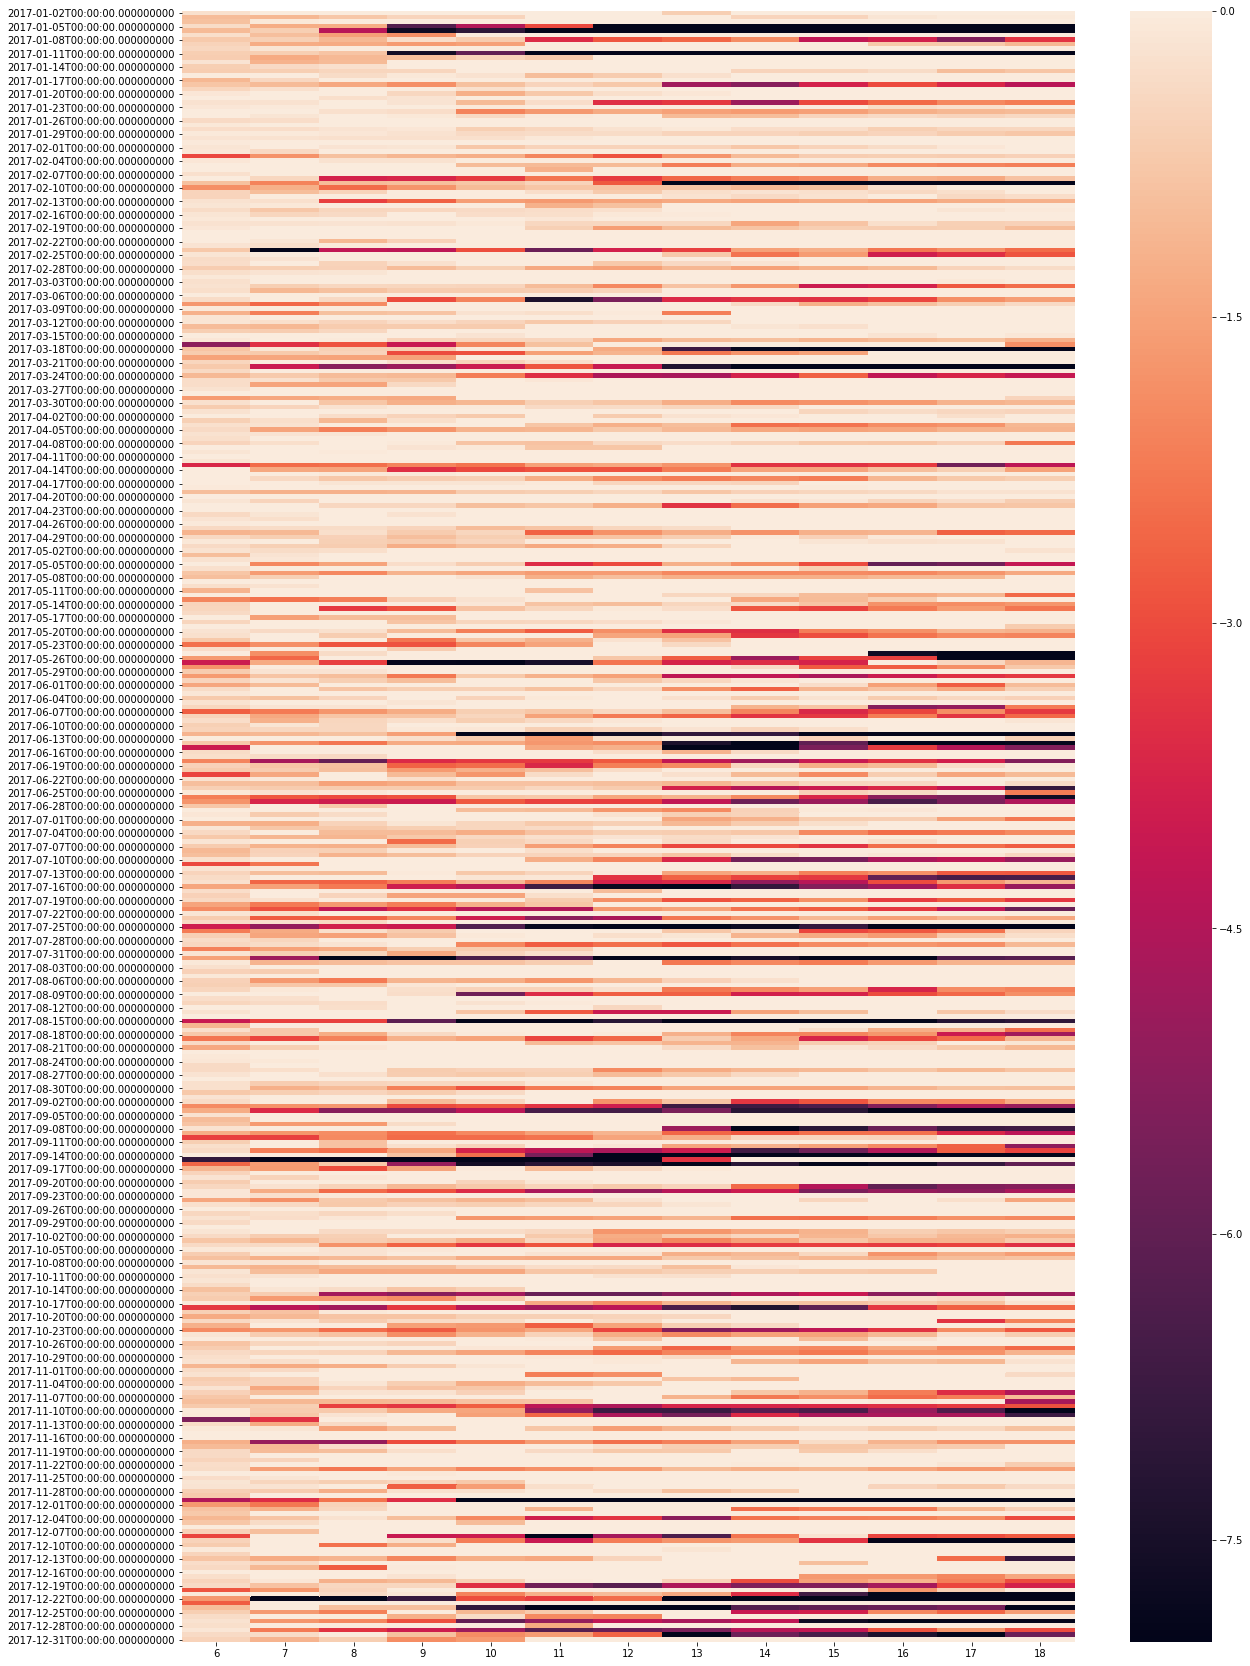

In [224]:
plt.figure(figsize=(20,30))
sns.heatmap(df_year_low, vmin=-8, vmax=0)

0 0 0 364
            high    low     open  win
2017-01-02  2.69  -0.62   997.75  1.0
2017-01-03  0.63  -1.08  1011.44  0.0
2017-01-04  8.79  -0.90  1035.51  1.0
2017-01-05  1.48 -20.96  1114.38  1.0
2017-01-06  1.01 -11.13  1004.73 -1.0


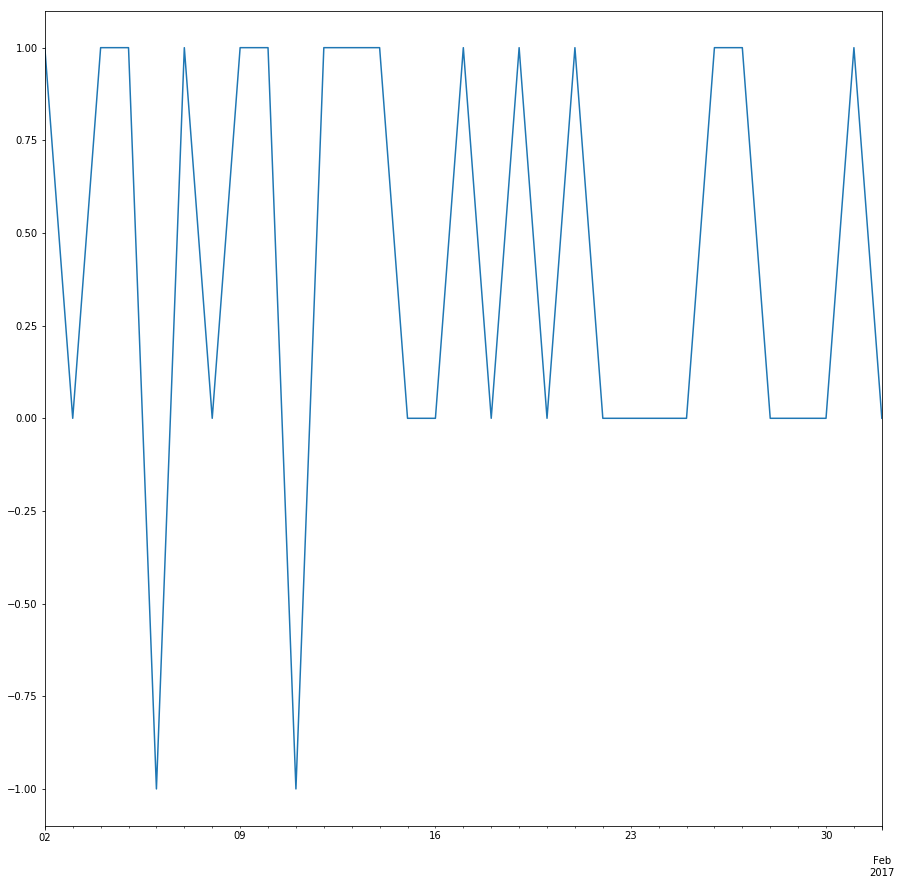

In [292]:
def getRowGain(index, row, openHour, endHour, high_rate, low_rate):
    openDate = index.replace(hour=openHour)
    open = df.loc[openDate]["open"]
    for i in range(openHour, endHour+1):
        high = row[i]
        low = df_year_low.loc[index][i]
        if(high>high_rate):
            return 1
        elif(low < low_rate):
            return -1
    return 0
    
  
high_rate = 1.4
low_rate = -8
fees_rate = 0.25/100
#openHour = 5
#endHour = 18

nbWins = 0
nbLoses = 0


df_wins = pd.DataFrame()
for index, row in df_year_high.iterrows():
    res = getRowGain(index, row, openHour, endHour, high_rate, low_rate)
    open = df.loc[index]["open"]
    high = df_year_high.loc[index].max()
    low = df_year_low.loc[index].min()
    
    serie = pd.Series([res, open, high, low], index=["win", "open", "high", "low"])
    serie = serie.rename(index)
    df_wins = df_wins.append(serie)
    #print(res)
#print(df_wins)
            
nbDays = df_year_high.shape[0]
missing = nbDays - (nbWins+nbLoses)
print(nbWins, nbLoses, nbWins + nbLoses,  missing)        
#df_wins.plot()
#df_wins.plot()
print(df_wins.head())
df_wins.head()
#df_wins.win.plot()

#df["open"].plot()
#.plot()
#sns.tsplot(df_wins["win"])
#df["open"].unique("weekNumber")
#plt.plot(df["ts"], [df["open"].unique("weekNumer"), df_wins])
plt.figure(figsize=(15,15))
df_wins.loc[:"2017-02-01", "win"].plot()


0 0 0 364
            high    low     open  win
2017-01-02  2.69  -0.62   997.75  1.0
2017-01-03  0.63  -1.08  1011.44  0.0
2017-01-04  8.79  -0.90  1035.51  1.0
2017-01-05  1.48 -20.96  1114.38 -1.0
2017-01-06  1.01 -11.13  1004.73 -1.0


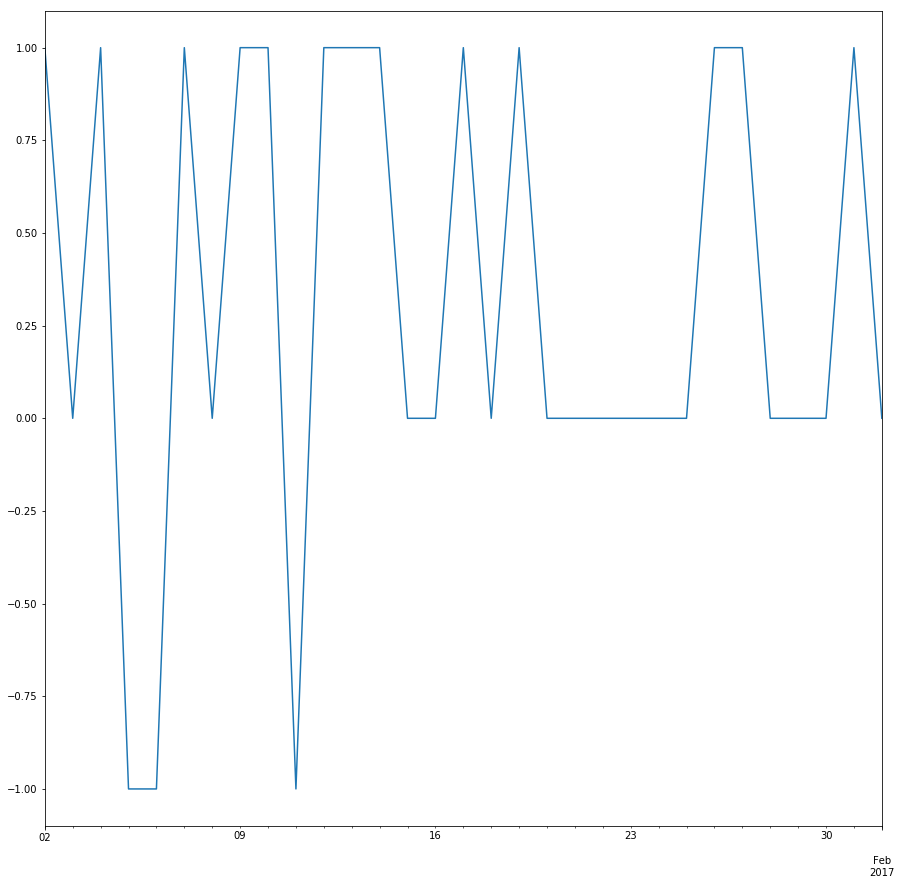

In [293]:
def getWins(df_high, df_low, openHour, endHour, high_rate, low_rate): 
    df_wins = pd.DataFrame()
    for index, row in df_year_high.iterrows():
        res = getRowGain(index, row, openHour, endHour, high_rate, low_rate)
        open = df.loc[index]["open"]
        high = df_year_high.loc[index].max()
        low = df_year_low.loc[index].min()

        serie = pd.Series([res, open, high, low], index=["win", "open", "high", "low"])
        serie = serie.rename(index)
        df_wins = df_wins.append(serie)
        #print(res)
    #print(df_wins)
    return df_wins

high_rate = 1.5
low_rate = -6
fees_rate = 0.25/100

nbWins = 0
nbLoses = 0

df_wins = getWins(df_year_high, df_year_low, openHour, endHour,  high_rate, low_rate)

nbDays = df_year_high.shape[0]
missing = nbDays - (nbWins+nbLoses)
print(nbWins, nbLoses, nbWins + nbLoses,  missing)        
print(df_wins.head())
plt.figure(figsize=(15,15))

df_wins.loc[:"2017-02-01", "win"].plot()

In [326]:
def getAmountAfterTransaction(amount, fees_rate, rate):
    amount_after_buying = amount * (1 - fees_rate)
    amount_before_selling = amount_after_buying * (1 + rate/100)
    amount_after_selling = amount_before_selling * (1 - fees_rate)
    diff = amount_after_selling - amount
    return diff

high_rate = 1.9
low_rate = -4
fees_rate = 0.25/100
print(getAmountAfterTransaction(1000, fees_rate, high_rate))
getAmountAfterTransaction(1000, fees_rate, low_rate)

13.911368749999951


-44.794000000000096

In [327]:
amount = 1000
high_rate = 1.5
low_rate = -6
fees_rate = 0.25/100

for index,row in df_wins.iterrows():
    win = row["win"]
    gain = 0
    rate = high_rate
    if(win < 1):
        rate = low_rate
    gain = gain + getAmountAfterTransaction(amount, fees_rate, rate)
    #print(gain)
        

In [328]:

def getGain(df_wins, amount, fees_rate, high_rate, low_rate):
    gain = 0
    for index,row in df_wins.iterrows():
        win = row["win"]
        rate = high_rate
        if(win < 1):
            rate = low_rate
        gain = gain + getAmountAfterTransaction(amount, fees_rate, rate)
        #print(gain)
    return gain

amount = 1000
high_rate = 1.9
low_rate = -4
fees_rate = 0.25/100
openHour = 6
endHour = 19

df_year_high, df_year_low = getHighLowDF(df, openHour, endHour)
df_wins = getWins(df_year_high, df_year_low, openHour, endHour,  high_rate, low_rate)
getGain(df_wins["2017-12":], amount, fees_rate, high_rate, low_rate)
        

137.72558749999826

-2%>1.0%/2h-19h -234.40675 $
-2%>1.0%/3h-19h -25.4554375 $
-2%>1.0%/4h-19h -55.305625 $
-2%>1.0%/5h-19h -174.706375 $
-2%>1.0%/6h-19h -25.4554375 $
-2%>1.0%/7h-19h -55.305625 $
-2%>1.0%/8h-19h -234.40675 $
-2%>1.0%/9h-19h -115.006 $
-2%>1.1%/2h-19h -216.4966375 $
-2%>1.1%/3h-19h -0.580281250002 $
-2%>1.1%/4h-19h -31.425475 $
-2%>1.1%/5h-19h -154.80625 $
-2%>1.1%/6h-19h -31.425475 $
-2%>1.1%/7h-19h -62.27066875 $
-2%>1.1%/8h-19h -278.187025 $
-2%>1.1%/9h-19h -154.80625 $
-2%>1.2%/2h-19h -230.426725 $
-2%>1.2%/3h-19h -71.225725 $
-2%>1.2%/4h-19h -7.545325 $
-2%>1.2%/5h-19h -134.906125 $
-2%>1.2%/6h-19h -7.545325 $
-2%>1.2%/7h-19h -39.385525 $
-2%>1.2%/8h-19h -262.266925 $
-2%>1.2%/9h-19h -166.746325 $
-2%>1.3%/2h-19h -213.51161875 $
-2%>1.3%/3h-19h -49.3355875 $
-2%>1.3%/4h-19h 16.334825 $
-2%>1.3%/5h-19h -147.84120625 $
-2%>1.3%/6h-19h -16.50038125 $
-2%>1.3%/7h-19h -49.3355875 $
-2%>1.3%/8h-19h -279.18203125 $
-2%>1.3%/9h-19h -180.6764125 $
-2%>1.4%/2h-19h -196.5965125 $
-2%>1.4%/3h-19

-5%>1.4%/3h-19h -105.0559375 $
-5%>1.4%/4h-19h 22.3048625 $
-5%>1.4%/5h-19h -296.0971375 $
-5%>1.4%/6h-19h 22.3048625 $
-5%>1.4%/7h-19h -359.7775375 $
-5%>1.4%/8h-19h -487.1383375 $
-5%>1.4%/9h-19h -487.1383375 $
-5%>1.5%/2h-19h -274.207 $
-5%>1.5%/3h-19h -144.8561875 $
-5%>1.5%/4h-19h 49.17003125 $
-5%>1.5%/5h-19h -274.207 $
-5%>1.5%/6h-19h 49.17003125 $
-5%>1.5%/7h-19h -338.88240625 $
-5%>1.5%/8h-19h -468.23321875 $
-5%>1.5%/9h-19h -468.23321875 $
-5%>1.6%/2h-19h -317.987275 $
-5%>1.6%/3h-19h -120.9760375 $
-5%>1.6%/4h-19h 76.0352 $
-5%>1.6%/5h-19h -252.3168625 $
-5%>1.6%/6h-19h 76.0352 $
-5%>1.6%/7h-19h -317.987275 $
-5%>1.6%/8h-19h -449.3281 $
-5%>1.6%/9h-19h -449.3281 $
-5%>1.7%/2h-19h -297.09214375 $
-5%>1.7%/3h-19h -97.0958875 $
-5%>1.7%/4h-19h -30.43046875 $
-5%>1.7%/5h-19h -230.426725 $
-5%>1.7%/6h-19h 102.90036875 $
-5%>1.7%/7h-19h -297.09214375 $
-5%>1.7%/8h-19h -430.42298125 $
-5%>1.7%/9h-19h -497.0884 $
-5%>1.8%/2h-19h -343.8574375 $
-5%>1.8%/3h-19h -73.2157375 $
-5%>1.8%/

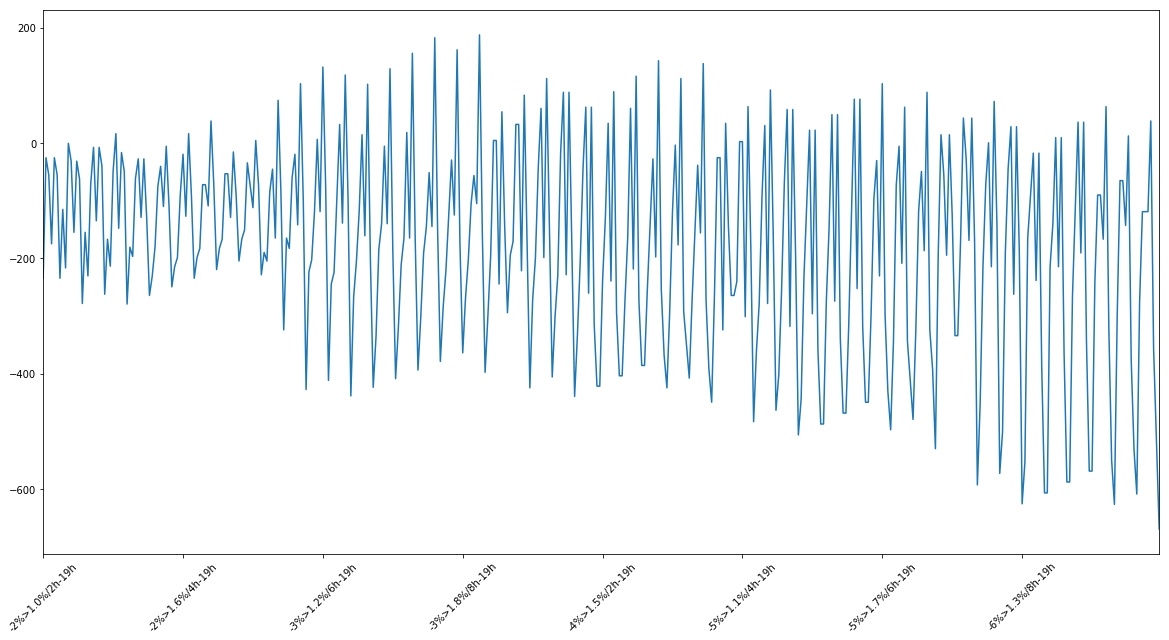

In [407]:
amount = 1000
high_rate = 1.9
low_rate = -4
fees_rate = 0.25/100
openHour = 6
endHour = 19



df_gains = pd.DataFrame()

low_rates = range(-2, -7, -1)
high_rates = np.arange(1.0, 2.0, 0.1)
openHours = range(2,10,1)
endHours = range(16,18,1)

for low_rate in low_rates:
    for high_rate in high_rates:
        for openHour in openHours:
            df_year_high, df_year_low = getHighLowDF(df, openHour, endHour)
            df_wins = getWins(df_year_high, df_year_low, openHour, endHour,  high_rate, low_rate)
            gain = getGain(df_wins["2017-12":], amount, fees_rate, high_rate, low_rate)

            index = str(low_rate)+"%>"+str(high_rate)+"%/"+str(openHour)+"h-"+str(endHour)+"h"
            serie = pd.Series(
                [gain, low_rate, high_rate, openHour, endHour, index], 
                index=["gain", "low_rate", "high_rate", "openHour", "endHour", "ticks"])
            serie = serie.rename(index)
            print(index, gain,"$")
            df_gains = df_gains.append(serie)

plt.figure(figsize=(20,10))
print("--")
print(df_gains.sort_values(by="gain")["gain"])
#plot = df_gains["gain"].plot(xticks=df_gains.index, rot=45)
#sns.heatmap(df_gains["gain"], annot=True)
plot = df_gains["gain"].plot(rot=45)
#df_gains.gain
#plot.set_xticklabels(df_gains["ticks"])
#print(df_gains.index)
#print(df_gains["ticks"].values)
#plot.set_xticks(df_gains.index)
#plot.tick_params(direction='out', length=6, width=2, colors='r')
#plot.set_xticklabels(df_gains.index, rotation=45)

## Explore with all year data

In [329]:
#for i in range(2,12):
#    plt.figure(figsize=(20,10))
#    sns.heatmap(df_year_high.loc["2017-"+str(i)+"-01":"2017-"+str(i+1)+"-01"], vmin=0, vmax=1.4)



In [ ]:
plt.figure(figsize=(20,10))
dff = df_wins.loc["2017-12":, "win"] 
ax = dff.plot(xticks=dff.index, rot=45)
ax.set_xticklabels(dff.index);

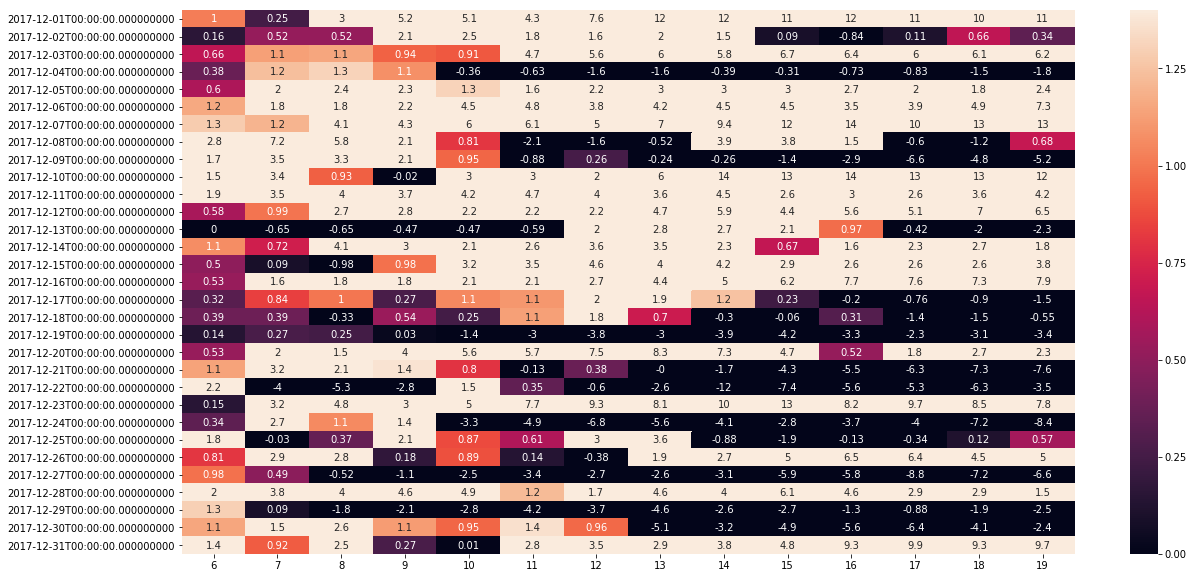

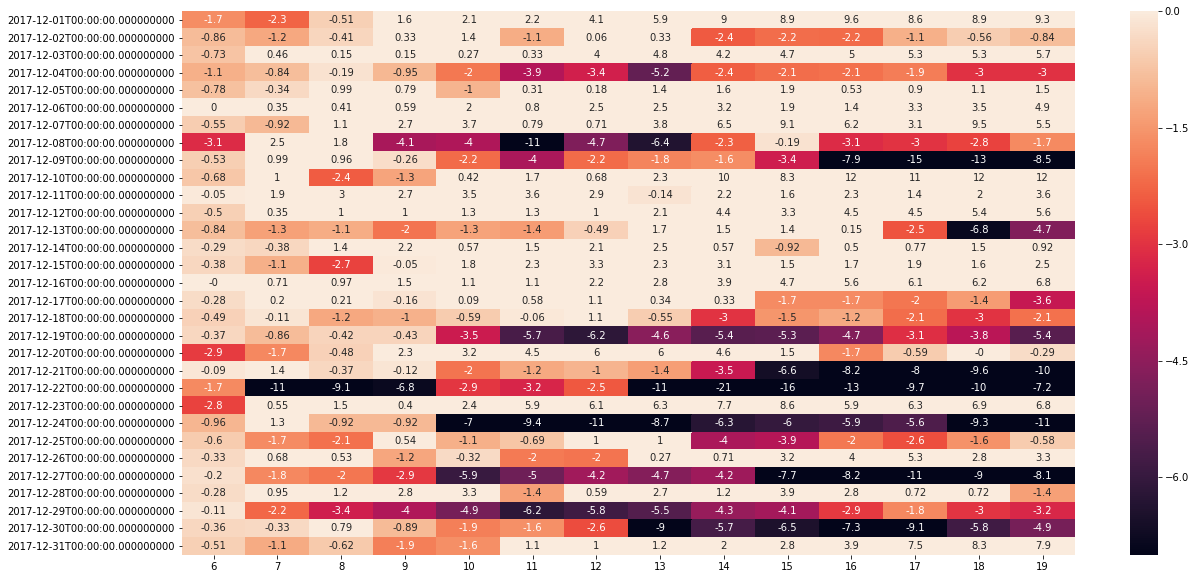

In [331]:
plt.figure(figsize=(20,10))
sns.heatmap(df_year_high.loc["2017-12-01":"2018-01-01"], vmin=0, vmax=1.4, annot=True)
plt.figure(figsize=(20,10))
sns.heatmap(df_year_low.loc["2017-12-01":"2018-01-01"], vmin=-7, vmax=0, annot=True)

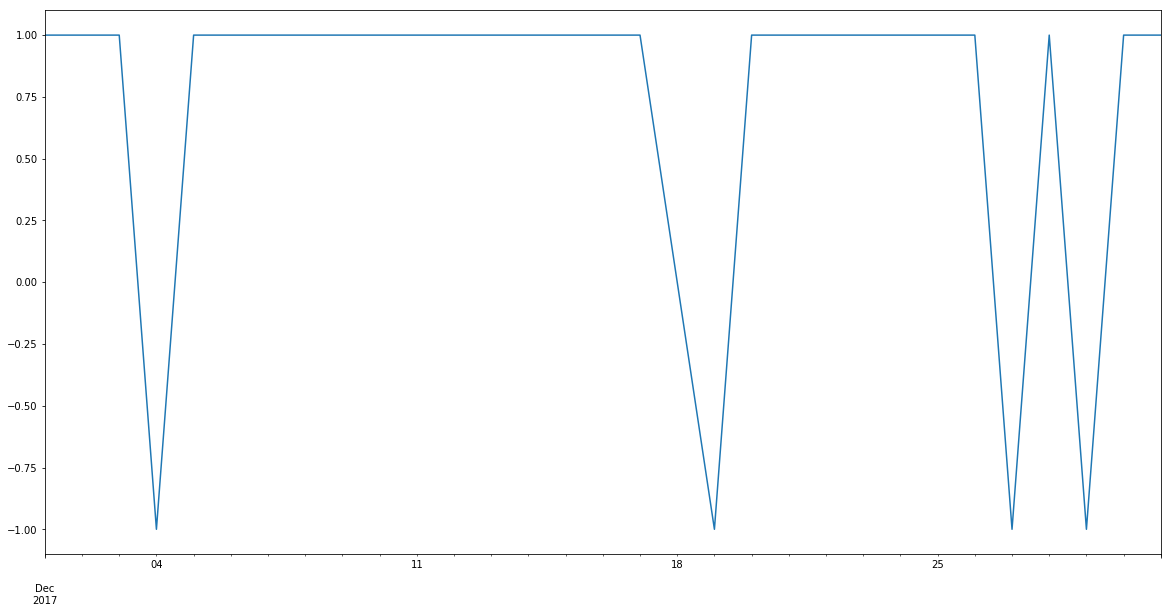

In [332]:
plt.figure(figsize=(20,10))
df_wins.loc["2017-12":,"win"].plot()